In [1]:
import pandas as pd
import re
import string
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Charger spaCy FR
nlp = spacy.load("fr_core_news_sm")

# Charger les données brutes
df = pd.read_csv("avis_sinners.csv")

# Nettoyage et traitement des commentaires avec spaCy
def nettoyer_avec_spacy(commentaire):
    commentaire = commentaire.lower()
    commentaire = re.sub(r"http\S+", "", commentaire)  # suppression des liens
    commentaire = re.sub(r"\d+", "", commentaire)      # suppression des chiffres
    commentaire = commentaire.translate(str.maketrans('', '', string.punctuation))  # ponctuation
    doc = nlp(commentaire)
    mots_utiles = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and len(token.text) > 2
    ]
    return " ".join(mots_utiles)

df['commentaire_nettoye'] = df['commentaire'].astype(str).apply(nettoyer_avec_spacy)

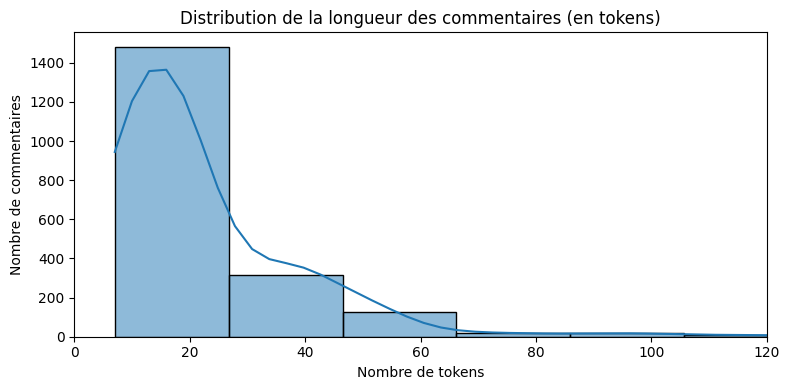

In [14]:
# Calcule la longueur de chaque commentaire (en nombre de tokens)
df["longueur"] = df["tokens"].apply(len)

# Affiche un histogramme avec un maximum de 300 mots
plt.figure(figsize=(8, 4))
sns.histplot(df["longueur"], bins=30, kde=True)
plt.title("Distribution de la longueur des commentaires (en tokens)")
plt.xlabel("Nombre de tokens")
plt.ylabel("Nombre de commentaires")
plt.xlim(0, 120)
plt.tight_layout()
plt.show()

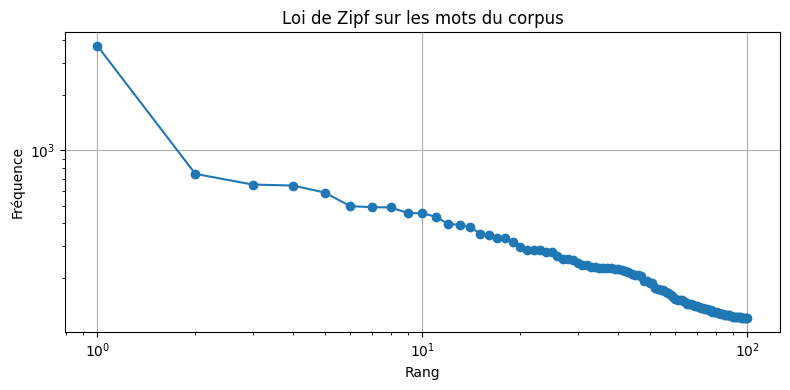

In [15]:
# Concatène tous les tokens dans une seule liste pour l'analyse
tous_les_mots = [mot for tokens in df["tokens"] for mot in tokens]
freq = Counter(tous_les_mots)
mots_freq = freq.most_common(100)

# Préparation des données pour la courbe log-log
rangs = range(1, len(mots_freq) + 1)
frequences = [f for _, f in mots_freq]

plt.figure(figsize=(8, 4))
plt.loglog(rangs, frequences, marker="o")
plt.title("Loi de Zipf sur les mots du corpus")
plt.xlabel("Rang")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()


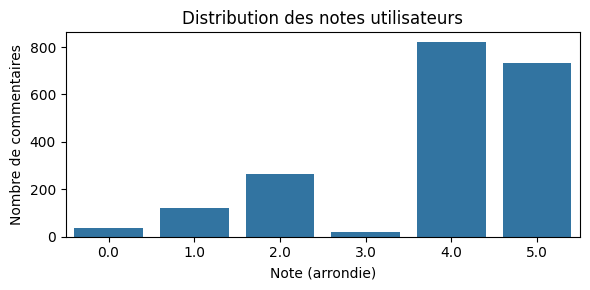

In [16]:
# Nettoyage de la colonne note (si nécessaire)
df["note"] = df["note"].astype(str).str.replace(',', '.').astype(float)

# Histogramme des notes arrondies (1 à 5)
plt.figure(figsize=(6, 3))
sns.countplot(x=df["note"].round())
plt.title("Distribution des notes utilisateurs")
plt.xlabel("Note (arrondie)")
plt.ylabel("Nombre de commentaires")
plt.tight_layout()
plt.show()


In [24]:
n = 15

# Compteurs pour les adjectifs et noms
compteur_adj = Counter()
compteur_nom = Counter()

# On parcourt tous les commentaires
for texte in df["commentaire"]:
    doc = nlp(str(texte))  
    for token in doc:
        # On prend les adjectifs
        if token.pos_ == "ADJ":
            compteur_adj[token.lemma_] += 1
        # On prend les noms
        elif token.pos_ == "NOUN":
            compteur_nom[token.lemma_] += 1

# Affichage des adjectifs les plus fréquents
print(f"{n} adjectifs les plus fréquents :")
for mot, freq in compteur_adj.most_common(n):
    print(f"{mot} : {freq}")

# Affichage des noms les plus fréquents
print(f"\n{n} noms les plus fréquents :")
for mot, freq in compteur_nom.most_common(n):
    print(f"{mot} : {freq}")

15 adjectifs les plus fréquents :
bon : 494
c’ : 494
incroyable : 283
blue : 251
magnifique : 235
intense : 223
musiqu : 216
exceptionnel : 208
grand : 174
long : 171
excellent : 167
premier : 154
autre : 148
original : 145
intéressant : 139

15 noms les plus fréquents :
film : 3703
musique : 752
histoire : 638
scène : 591
horreur : 535
l’ : 468
acteur : 465
blues : 437
sinner : 435
vampire : 368
époque : 360
racisme : 348
émotion : 334
personnage : 312
année : 298
